In [41]:
import pandas as pd
import glob

In [42]:
data_path = '/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data'

### Sentenze Penali Cassazione
http://www.italgiure.giustizia.it/sncass/ 

In [ ]:
pdf1 = pd.read_csv(data_path +'/sentenze_penale_pdf.csv')
pdf2 = pd.read_csv(data_path +'/sentenze_penale_pdf2.csv')

In [ ]:
pdfs = pd.concat([pdf1,pdf2])

In [ ]:
pdfs

,link,text
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...


In [ ]:
pdfs['text'].nunique()

216

In [ ]:
pdfs['chars'] = pdfs['text'].apply(len)
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...,47626
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


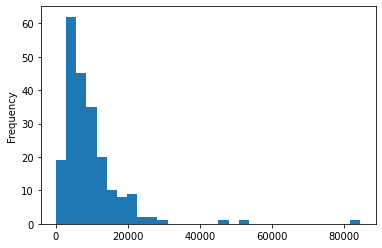

In [ ]:
pdfs['chars'].plot.hist(bins=30)

In [ ]:
pdfs = pdfs[pdfs['chars']<40000]
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [ ]:
pdfs[pdfs['chars'] <200]

,link,text,chars
14,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46388 Anno 2021Pre...,124
17,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46138 Anno 2021Pre...,134
37,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46416 Anno 2021Pre...,125
65,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46876 Anno 2021Pre...,130
83,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46410 Anno 2021Pre...,123
86,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46135 Anno 2021Pre...,116
99,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 45839 Anno 2021Pre...,120
116,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 3 Num. 46817 Anno 2021Pre...,119
135,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46758 Anno 2021Pre...,127
140,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46156 Anno 2021Pre...,124


In [ ]:
#Remove the lines that have a short text that correspond to judgments in the darkening phase
pdfs = pdfs[pdfs['chars'] > 200]

In [ ]:
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [ ]:
pdfs.to_csv(data_path +'/sentenze_penali_clean.csv', index = False)

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
df

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
195,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
196,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
197,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
198,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


### Text file for annotation 

In [ ]:
sample_1 = df.head(51)

In [ ]:
txt = " \n ".join(s.lower() for s in sample_1['text'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_1.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

Use this web tool https://abera87.github.io/annotate/ from this paper https://arxiv.org/pdf/2108.08184.pdf

In [48]:
s = pd.read_json(data_path'/Output.json').head(27)
s


,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto dal procuratore ...,"[tonuzi anxhela, tiziana casale, giuseppina an...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,1,sentenza sul ricorso proposto da: iuliano nad...,"[iuliano nadia, difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,2,sentenza sui ricorsi proposti da: borsan mari...,"[borsan maricel, socio marius, difensore, proc...","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,sentenza sul ricorso proposto da: patruno giu...,"[patruno giuseppe, corte di appello, difensore...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,sentenza sul ricorso proposto da: herrera ara...,"[herrera ara luis, pirro antonella, difensore,...","[{'Arg1Text': 'herrera ara luis', 'Arg2Text': ..."
5,5,sentenza sui ricorsi proposti da: levakovic m...,"[levakovic mirella, hudorovich simonetta, la c...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: giugno dari...,"[giugno dario, difensore, tribunale di brescia...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,sentenza sul ricorso proposto da: merletti er...,"[merletti ercole, difensore, procura generale,...","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,8,sentenza sul ricorso proposto da pelle sebast...,"[pelle sebastiano, alfredo giovinazzo, frances...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,9,sentenza sul ricorso proposto da parrinello v...,"[parrinello vincenzo, domenico infantino, dife...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


## Sentenze Giustizia Ammnistrativa
https://www.giustizia-amministrativa.it/web/guest/dcsnprr

In [ ]:
htmls = pd.read_csv(data_path +'/sentenze_html.csv')
htmls

,link,html,text
0,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",ex art. 60 cod. proc. amm.;sul ricorso numero...
1,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",sul ricorso numero di registro generale 3942 ...
2,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",ex art. 74 cod. proc. amm.;sul ricorso numero...
3,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",ex art. 60 cod. proc. amm.;sul ricorso numero...
4,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",sul ricorso numero di registro generale 5830 ...
...,...,...,...
943,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",sul ricorso numero di registro generale 6281 ...
944,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",sul ricorso numero di registro generale 3937 ...
945,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",sul ricorso numero di registro generale 6303 ...
946,https://www.giustizia-amministrativa.it/portal...,"b'<html lang=""it"" xmlns:h=""http://www.w3.org/H...",sul ricorso numero di registro generale 1595 ...


In [ ]:
htmls['text'].nunique()

948